In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
bank = pd.read_excel("bankruptcy-prevention.xlsx")

In [3]:
bank

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy
...,...
245,0;1;1;1;1;1;non-bankruptcy
246,1;1;0.5;1;1;0;non-bankruptcy
247,0;1;1;0.5;0.5;0;non-bankruptcy
248,1;0;0.5;1;0.5;0;non-bankruptcy


In [4]:
bank = bank['industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class'].str.split(';', expand=True)
bank

,0,1,2,3,4,5,6
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy
...,...,...,...,...,...,...,...
245,0,1,1,1,1,1,non-bankruptcy
246,1,1,0.5,1,1,0,non-bankruptcy
247,0,1,1,0.5,0.5,0,non-bankruptcy
248,1,0,0.5,1,0.5,0,non-bankruptcy


In [5]:
bank.columns = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']
bank

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy
...,...,...,...,...,...,...,...
245,0,1,1,1,1,1,non-bankruptcy
246,1,1,0.5,1,1,0,non-bankruptcy
247,0,1,1,0.5,0.5,0,non-bankruptcy
248,1,0,0.5,1,0.5,0,non-bankruptcy


In [6]:
#converting all the data from object to float

bank['industrial_risk'] = pd.to_numeric(bank['industrial_risk'], errors='coerce').fillna(0).astype(float)
bank['management_risk'] = pd.to_numeric(bank['management_risk'], errors='coerce').fillna(0).astype(float)
bank['financial_flexibility'] = pd.to_numeric(bank['financial_flexibility'], errors='coerce').fillna(0).astype(float)
bank['credibility'] = pd.to_numeric(bank['credibility'], errors='coerce').fillna(0).astype(float)
bank['competitiveness'] = pd.to_numeric(bank['competitiveness'], errors='coerce').fillna(0).astype(float)
bank['operating_risk'] = pd.to_numeric(bank['operating_risk'], errors='coerce').fillna(0).astype(float)

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [8]:
bank.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
bank.shape

(250, 7)

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


# Cheaking if there are null values or not

In [11]:
bank.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [12]:
#check distribution of the 'target variable=class'
grp=bank.groupby('class').count() 
grp

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
class,,,,,,
bankruptcy,107,107,107,107,107,107
non-bankruptcy,143,143,143,143,143,143


# Converting class values into numeeric value where bankruptcy = 0, non-bankruptcy = 1

In [13]:
bank["class_chg"]=""


In [14]:
bank.loc[bank['class'] == 'bankruptcy', 'class_chg'] = 1
bank.loc[bank['class'] == 'non-bankruptcy', 'class_chg'] = 0

In [15]:
bank

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_chg
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,0
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,0
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,0
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,0


In [16]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
 7   class_chg              250 non-null    object 
dtypes: float64(6), object(2)
memory usage: 15.8+ KB


In [17]:
bank['class_chg'] = pd.to_numeric(bank['class_chg'], errors='coerce').fillna(0).astype('int64')

In [18]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
 7   class_chg              250 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 15.8+ KB


# Exploratory Data Analysis (EDA) 

### EDA For Industrial Risk 

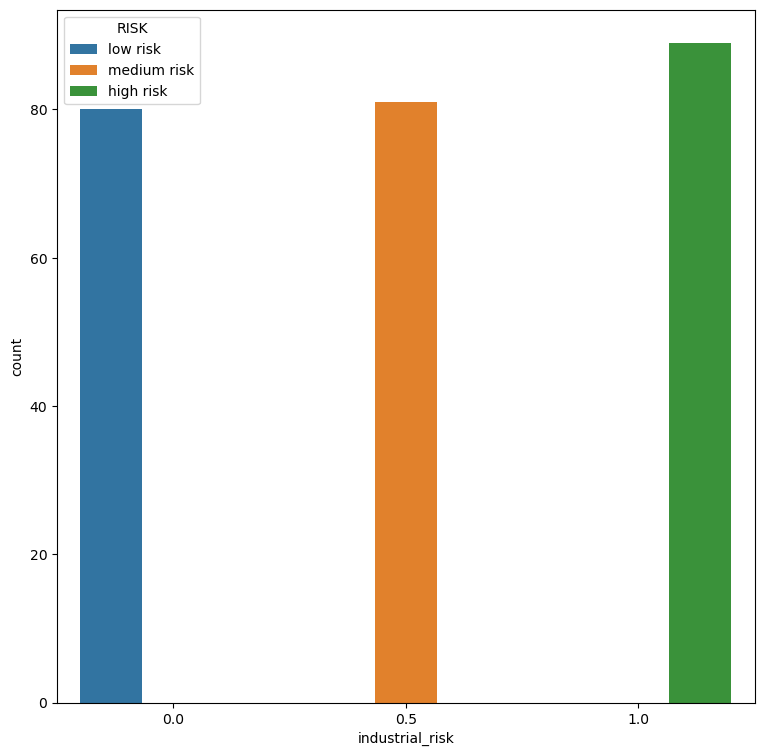

In [19]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.countplot(data=bank, x='industrial_risk',hue='industrial_risk')
plt.legend(title='RISK',labels=['low risk','medium risk','high risk'])

In [20]:
bankruptcy_counts = bank[bank['class'] == 'bankruptcy']['industrial_risk'].value_counts()
bankruptcy_counts

industrial_risk
1.0    53
0.5    28
0.0    26
Name: count, dtype: int64

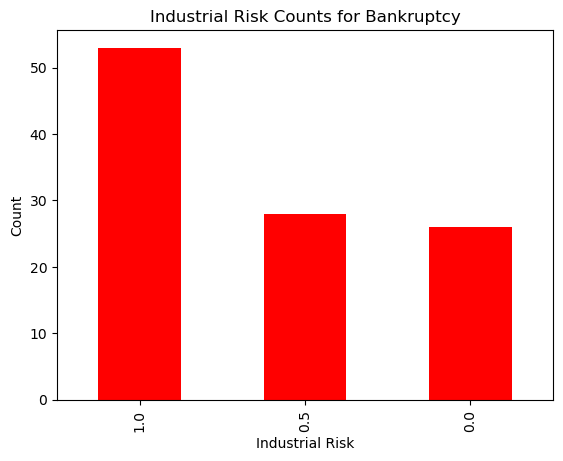

In [21]:
bankruptcy_counts.plot(kind='bar', color='red')
plt.title('Industrial Risk Counts for Bankruptcy')
plt.xlabel('Industrial Risk')
plt.ylabel('Count')
plt.show()

In [22]:
non_bankruptcy_counts = bank[bank['class'] == 'non-bankruptcy']['industrial_risk'].value_counts()
non_bankruptcy_counts

industrial_risk
0.0    54
0.5    53
1.0    36
Name: count, dtype: int64

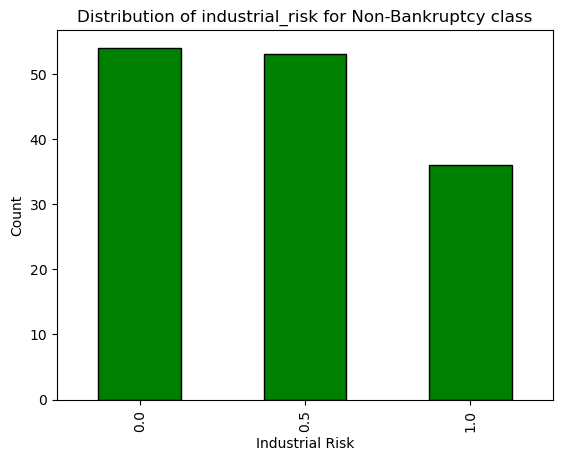

In [23]:
non_bankruptcy_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of industrial_risk for Non-Bankruptcy class')
plt.xlabel('Industrial Risk')
plt.ylabel('Count')
plt.show()

### EDA For Managment Risk

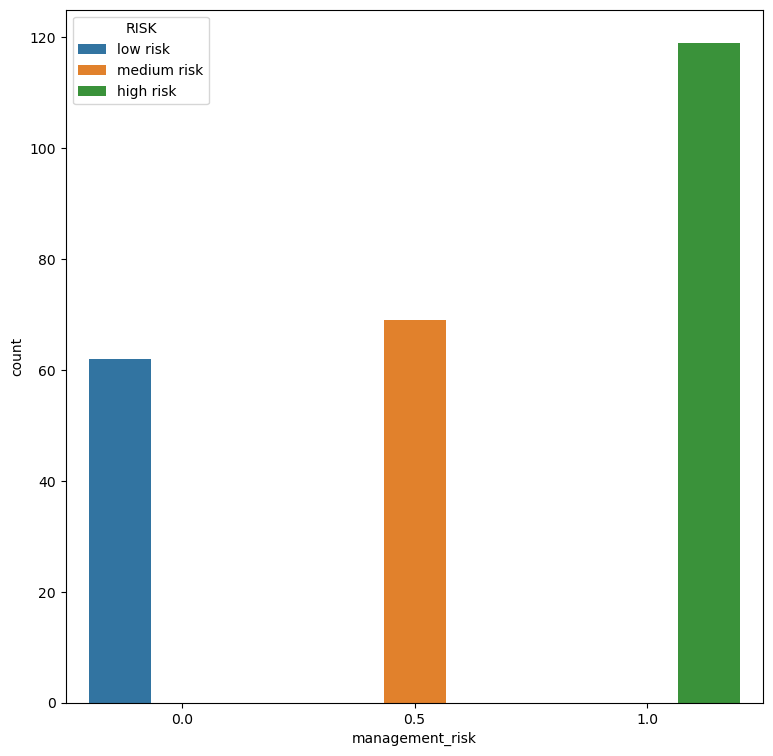

In [24]:
plt.figure(figsize=(9,9))
sns.countplot(data=bank, x='management_risk',hue='management_risk')
plt.legend(title='RISK',labels=['low risk','medium risk','high risk'])

In [25]:
bankruptcy_counts = bank[bank['class'] == 'bankruptcy']['management_risk'].value_counts()
bankruptcy_counts

management_risk
1.0    73
0.5    23
0.0    11
Name: count, dtype: int64

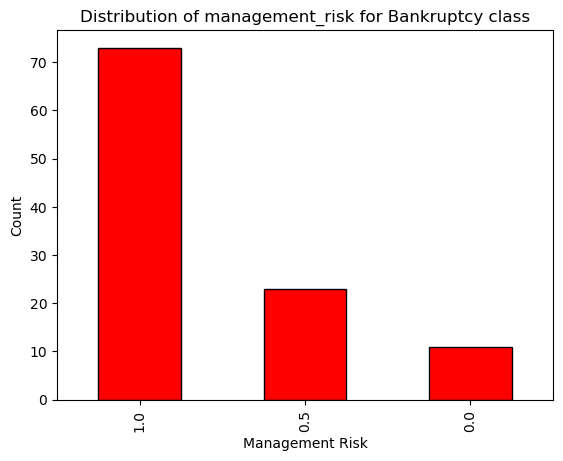

In [26]:
bankruptcy_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Distribution of management_risk for Bankruptcy class')
plt.xlabel('Management Risk')
plt.ylabel('Count')
plt.show()

In [27]:
non_bankruptcy_counts = bank[bank['class'] == 'non-bankruptcy']['management_risk'].value_counts()
non_bankruptcy_counts

management_risk
0.0    51
1.0    46
0.5    46
Name: count, dtype: int64

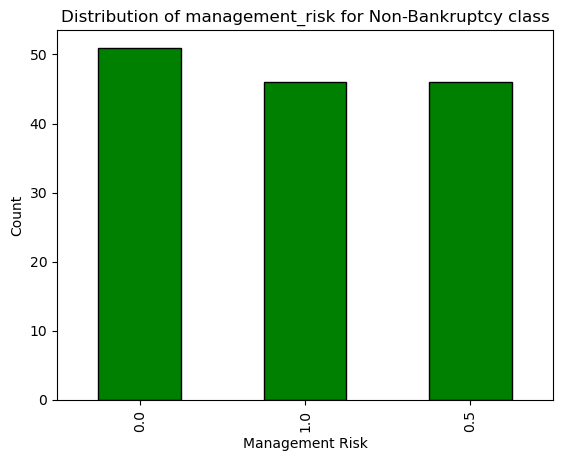

In [28]:
non_bankruptcy_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of management_risk for Non-Bankruptcy class')
plt.xlabel('Management Risk')
plt.ylabel('Count')
plt.show()

### EDA For Financial Flexibility

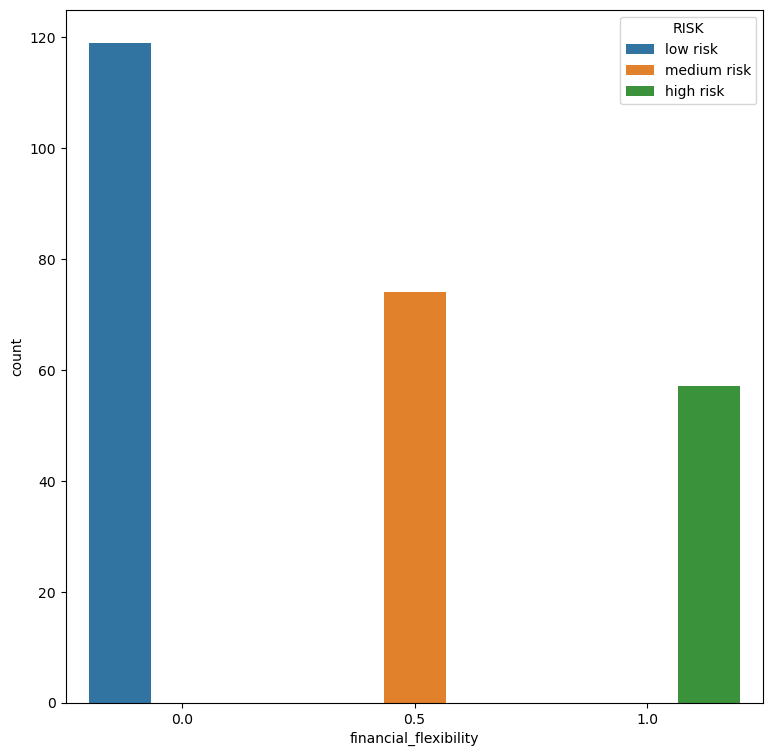

In [29]:
plt.figure(figsize=(9,9))
sns.countplot(data=bank, x='financial_flexibility',hue='financial_flexibility')
plt.legend(title='RISK',labels=['low risk','medium risk','high risk'])

In [30]:
bankruptcy_counts = bank[bank['class'] == 'bankruptcy']['financial_flexibility'].value_counts()
bankruptcy_counts

financial_flexibility
0.0    102
0.5      4
1.0      1
Name: count, dtype: int64

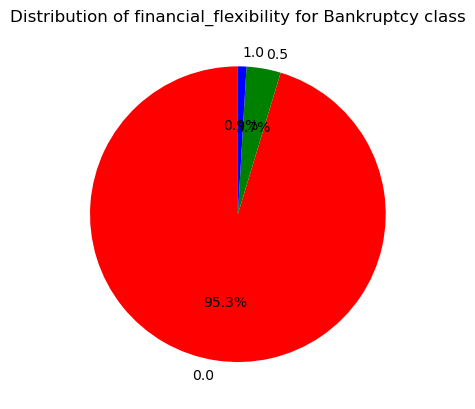

In [31]:
plt.pie(bankruptcy_counts, labels=bankruptcy_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Distribution of financial_flexibility for Bankruptcy class')
plt.show()

In [32]:
non_bankruptcy_counts = bank[bank['class'] == 'non-bankruptcy']['financial_flexibility'].value_counts()
non_bankruptcy_counts

financial_flexibility
0.5    70
1.0    56
0.0    17
Name: count, dtype: int64

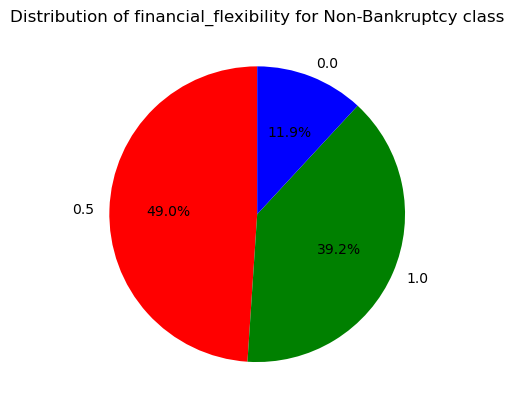

In [33]:
plt.pie(non_bankruptcy_counts, labels=non_bankruptcy_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Distribution of financial_flexibility for Non-Bankruptcy class')
plt.show()

### EDA  For Credibility

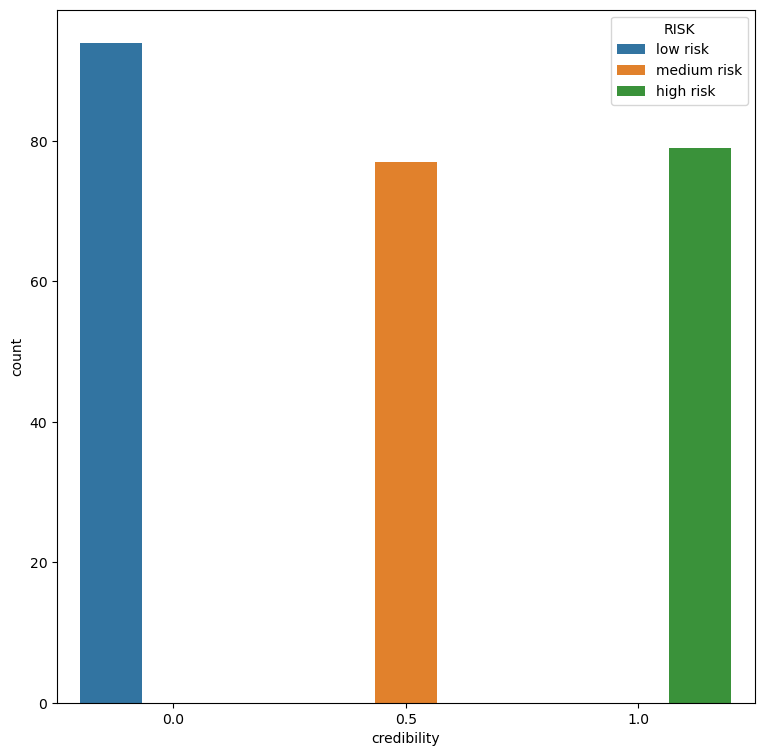

In [34]:
plt.figure(figsize=(9,9))
sns.countplot(data=bank, x='credibility',hue='credibility')
plt.legend(title='RISK',labels=['low risk','medium risk','high risk'])

In [35]:
bankruptcy_counts = bank[bank['class'] == 'bankruptcy']['credibility'].value_counts()
bankruptcy_counts

credibility
0.0    87
0.5    17
1.0     3
Name: count, dtype: int64

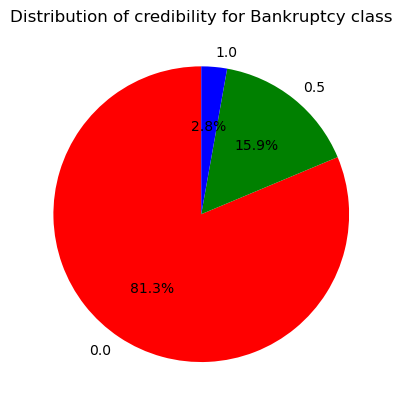

In [36]:
plt.pie(bankruptcy_counts, labels=bankruptcy_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Distribution of credibility for Bankruptcy class')
plt.show()

In [37]:
non_bankruptcy_counts = bank[bank['class'] == 'non-bankruptcy']['credibility'].value_counts()
non_bankruptcy_counts

credibility
1.0    76
0.5    60
0.0     7
Name: count, dtype: int64

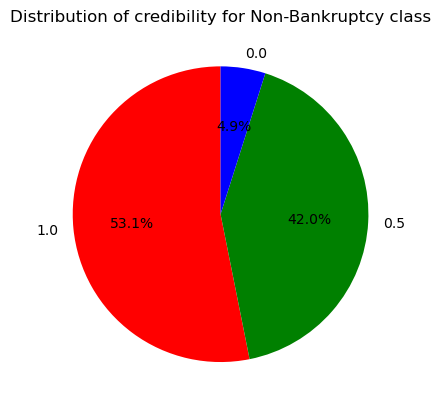

In [38]:
plt.pie(non_bankruptcy_counts, labels=non_bankruptcy_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Distribution of credibility for Non-Bankruptcy class')
plt.show()

### EDA For Competitiveness

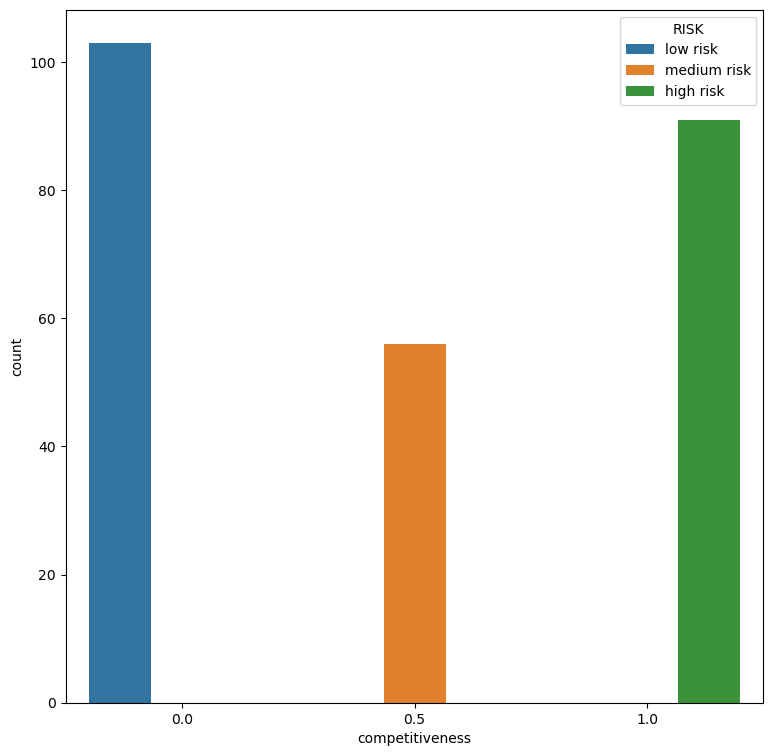

In [39]:
plt.figure(figsize=(9,9))
sns.countplot(data=bank, x='competitiveness',hue='competitiveness')
plt.legend(title='RISK',labels=['low risk','medium risk','high risk'])

In [40]:
bankruptcy_counts = bank[bank['class'] == 'bankruptcy']['competitiveness'].value_counts()
bankruptcy_counts

competitiveness
0.0    103
0.5      4
Name: count, dtype: int64

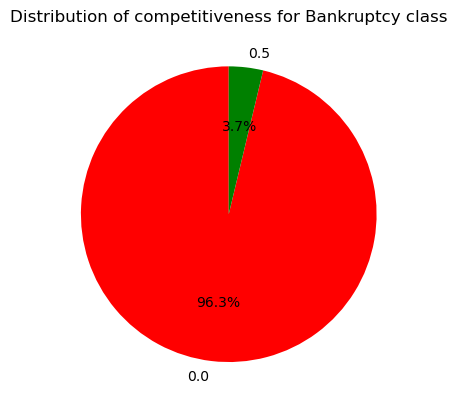

In [41]:
plt.pie(bankruptcy_counts, labels=bankruptcy_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Distribution of competitiveness for Bankruptcy class')
plt.show()

In [42]:
non_bankruptcy_counts = bank[bank['class'] == 'non-bankruptcy']['competitiveness'].value_counts()
non_bankruptcy_counts

competitiveness
1.0    91
0.5    52
Name: count, dtype: int64

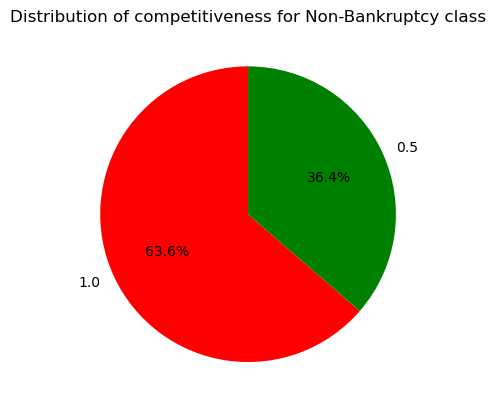

In [43]:
plt.pie(non_bankruptcy_counts, labels=non_bankruptcy_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Distribution of competitiveness for Non-Bankruptcy class')
plt.show()

### EDA For Operating Risk

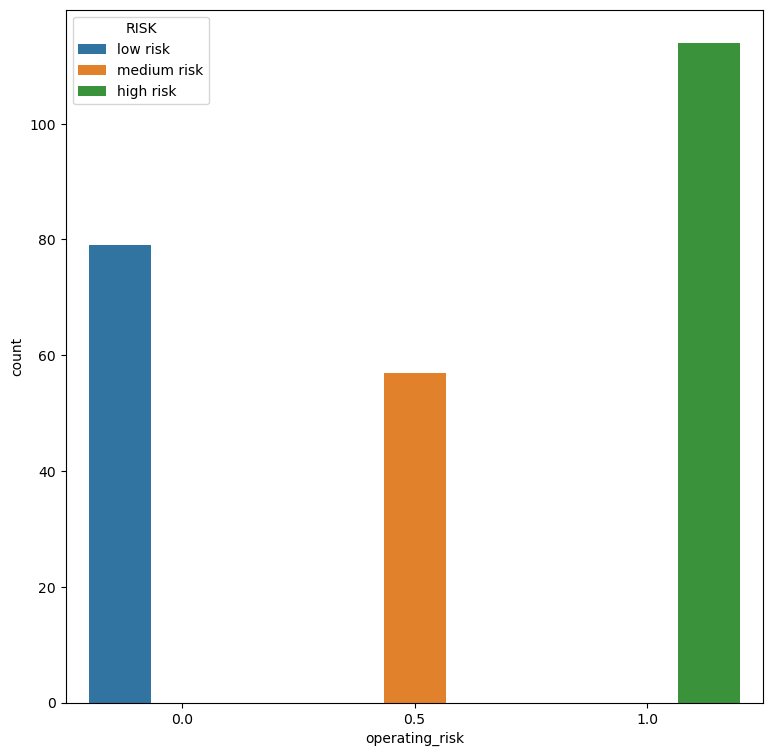

In [44]:
plt.figure(figsize=(9,9))
sns.countplot(data=bank, x='operating_risk',hue='operating_risk')
plt.legend(title='RISK',labels=['low risk','medium risk','high risk'])

In [45]:
bankruptcy_counts = bank[bank['class'] == 'bankruptcy']['operating_risk'].value_counts()
bankruptcy_counts

operating_risk
1.0    64
0.5    24
0.0    19
Name: count, dtype: int64

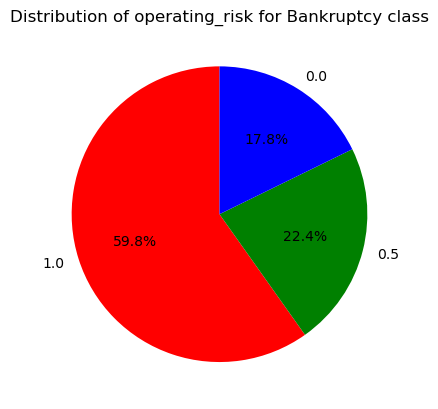

In [46]:
plt.pie(bankruptcy_counts, labels=bankruptcy_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Distribution of operating_risk for Bankruptcy class')
plt.show()

In [47]:
non_bankruptcy_counts = bank[bank['class'] == 'non-bankruptcy']['operating_risk'].value_counts()
non_bankruptcy_counts

operating_risk
0.0    60
1.0    50
0.5    33
Name: count, dtype: int64

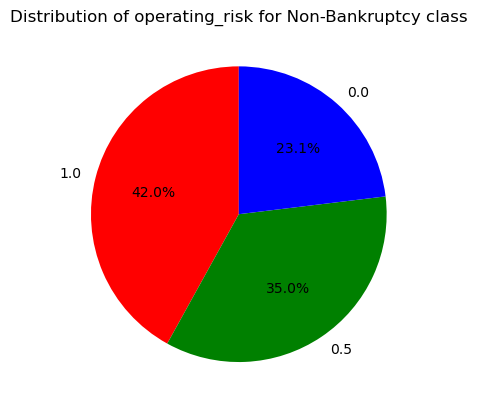

In [48]:
plt.pie(non_bankruptcy_counts, labels=bankruptcy_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Distribution of operating_risk for Non-Bankruptcy class')
plt.show()

In [49]:
numerical_columns = bank.columns[:-1] 
df_numerical = bank[numerical_columns]

In [50]:
df_numerical = df_numerical.apply(pd.to_numeric, errors='coerce')

In [51]:
df_numerical

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,NaN
1,0.0,1.0,0.0,0.0,0.0,1.0,NaN
2,1.0,0.0,0.0,0.0,0.0,1.0,NaN
3,0.5,0.0,0.0,0.5,0.0,1.0,NaN
4,1.0,1.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,NaN
246,1.0,1.0,0.5,1.0,1.0,0.0,NaN
247,0.0,1.0,1.0,0.5,0.5,0.0,NaN
248,1.0,0.0,0.5,1.0,0.5,0.0,NaN


In [52]:
z_scores = zscore(df_numerical)

In [53]:
df_zscores = pd.DataFrame(z_scores, columns=numerical_columns)

In [54]:
threshold = 3
outliers = (df_zscores > threshold) | (df_zscores < -threshold)
outliers_rows = bank[outliers.any(axis=1)]

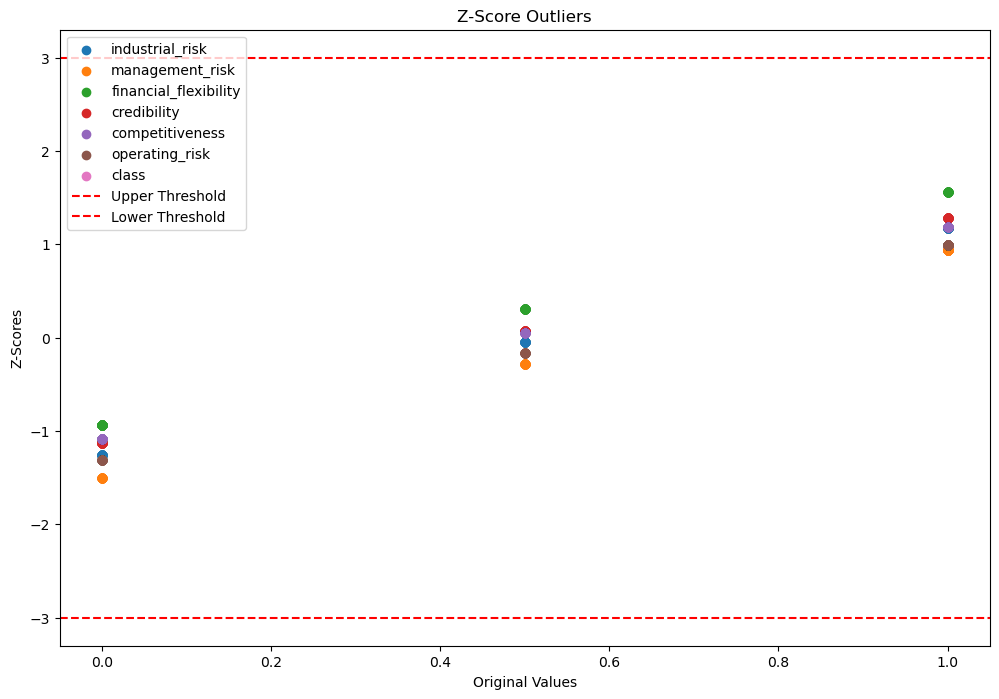

In [55]:
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    plt.scatter(df_numerical[column], df_zscores[column], label=column)

plt.axhline(y=threshold, color='r', linestyle='--', label='Upper Threshold')
plt.axhline(y=-threshold, color='r', linestyle='--', label='Lower Threshold')
plt.title('Z-Score Outliers')
plt.xlabel('Original Values')
plt.ylabel('Z-Scores')
plt.legend()
plt.show()

In the scatter plot, each point represents a data point, and the x-axis shows the original values, while the y-axis shows the Z-scores. The red dashed lines represent the upper and lower Z-score thresholds for identifying outliers.


# Data Visualization

In [56]:
train_df=bank.copy()

C:\Users\shiom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


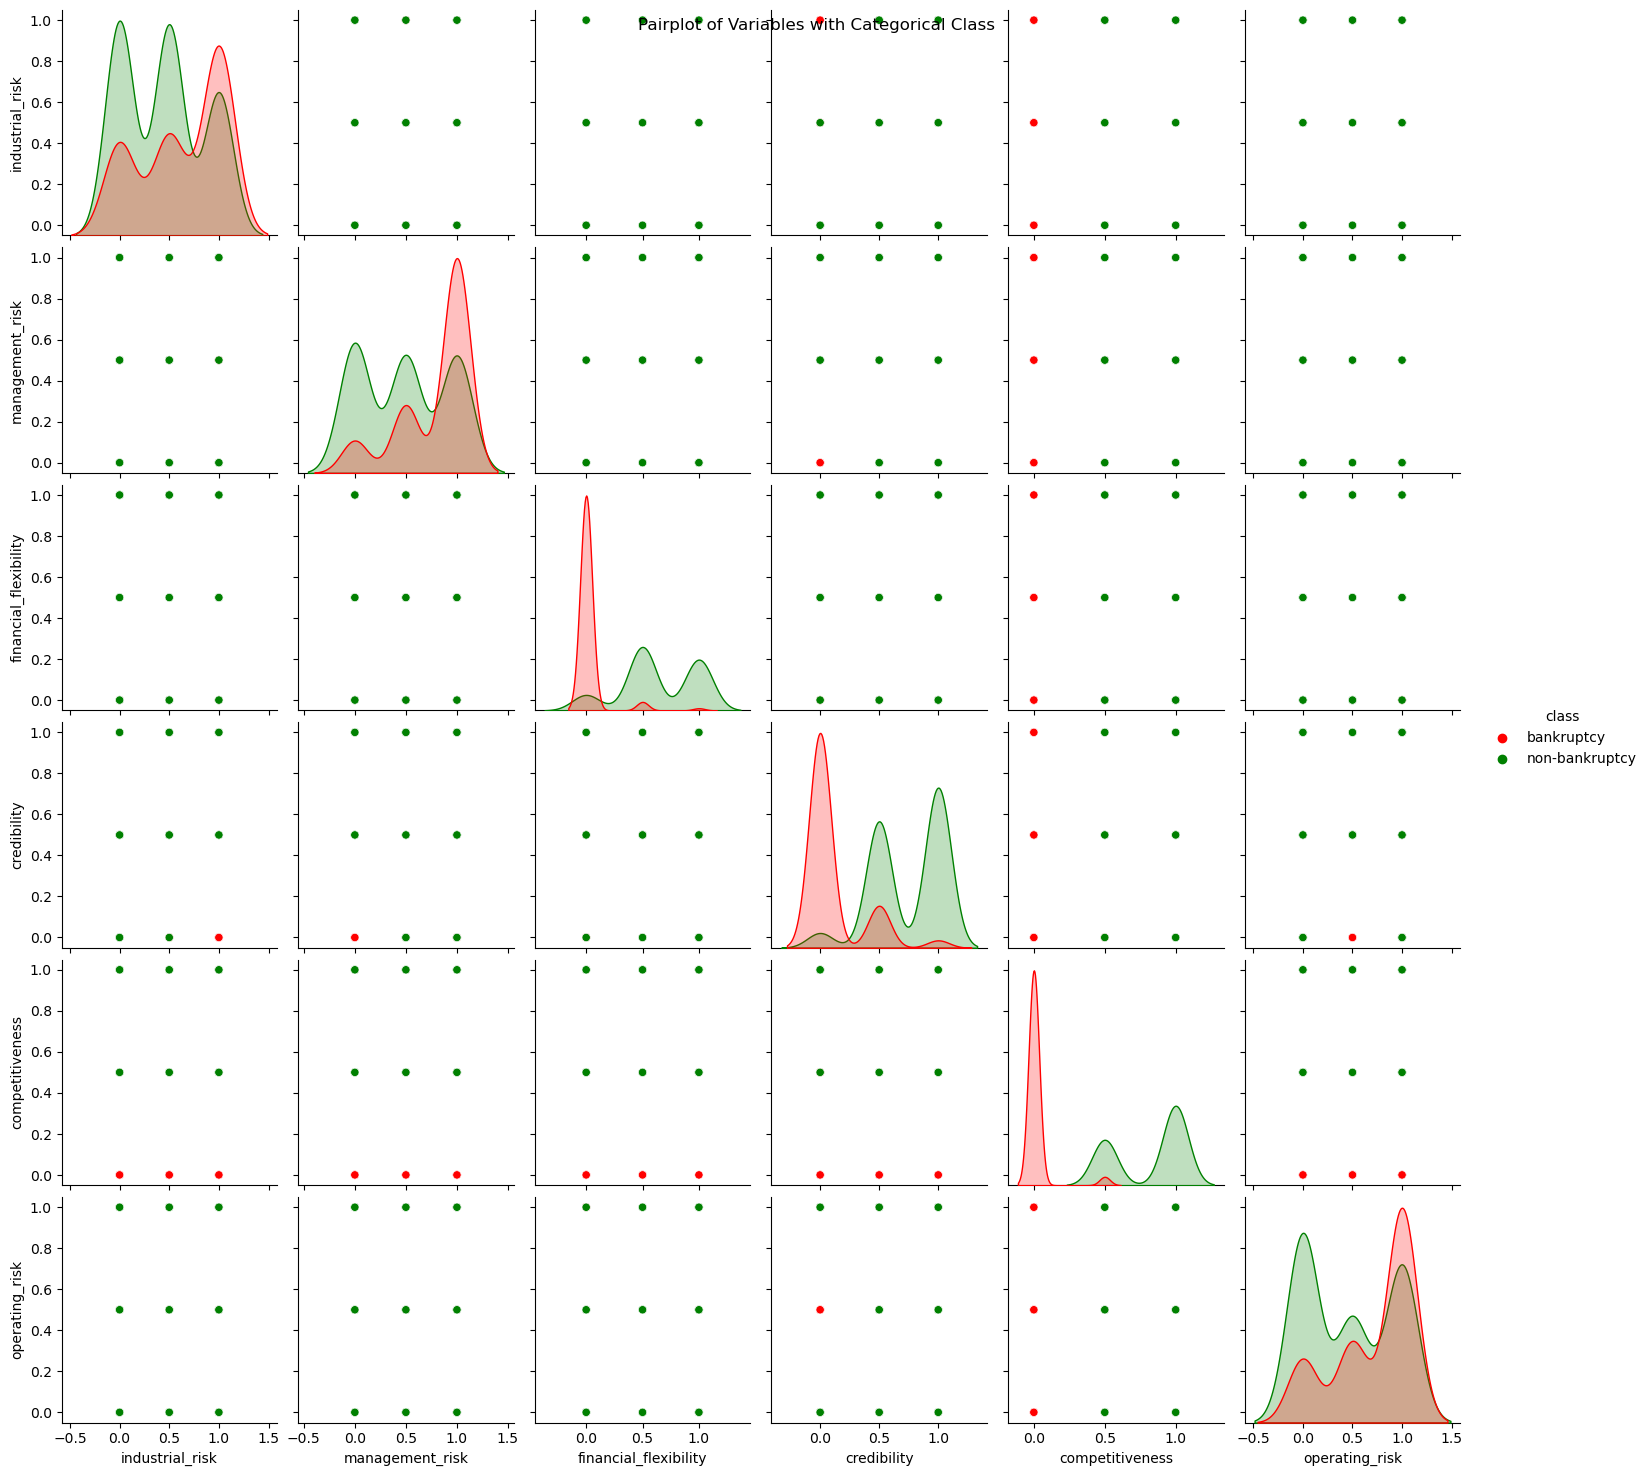

In [57]:
bank = bank.drop('class_chg', axis=1)
sns.pairplot(bank, hue='class', palette={'bankruptcy': 'red', 'non-bankruptcy': 'green'})

plt.suptitle('Pairplot of Variables with Categorical Class')
plt.show()

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class_chg                  int64
dtype: object


C:\Users\shiom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


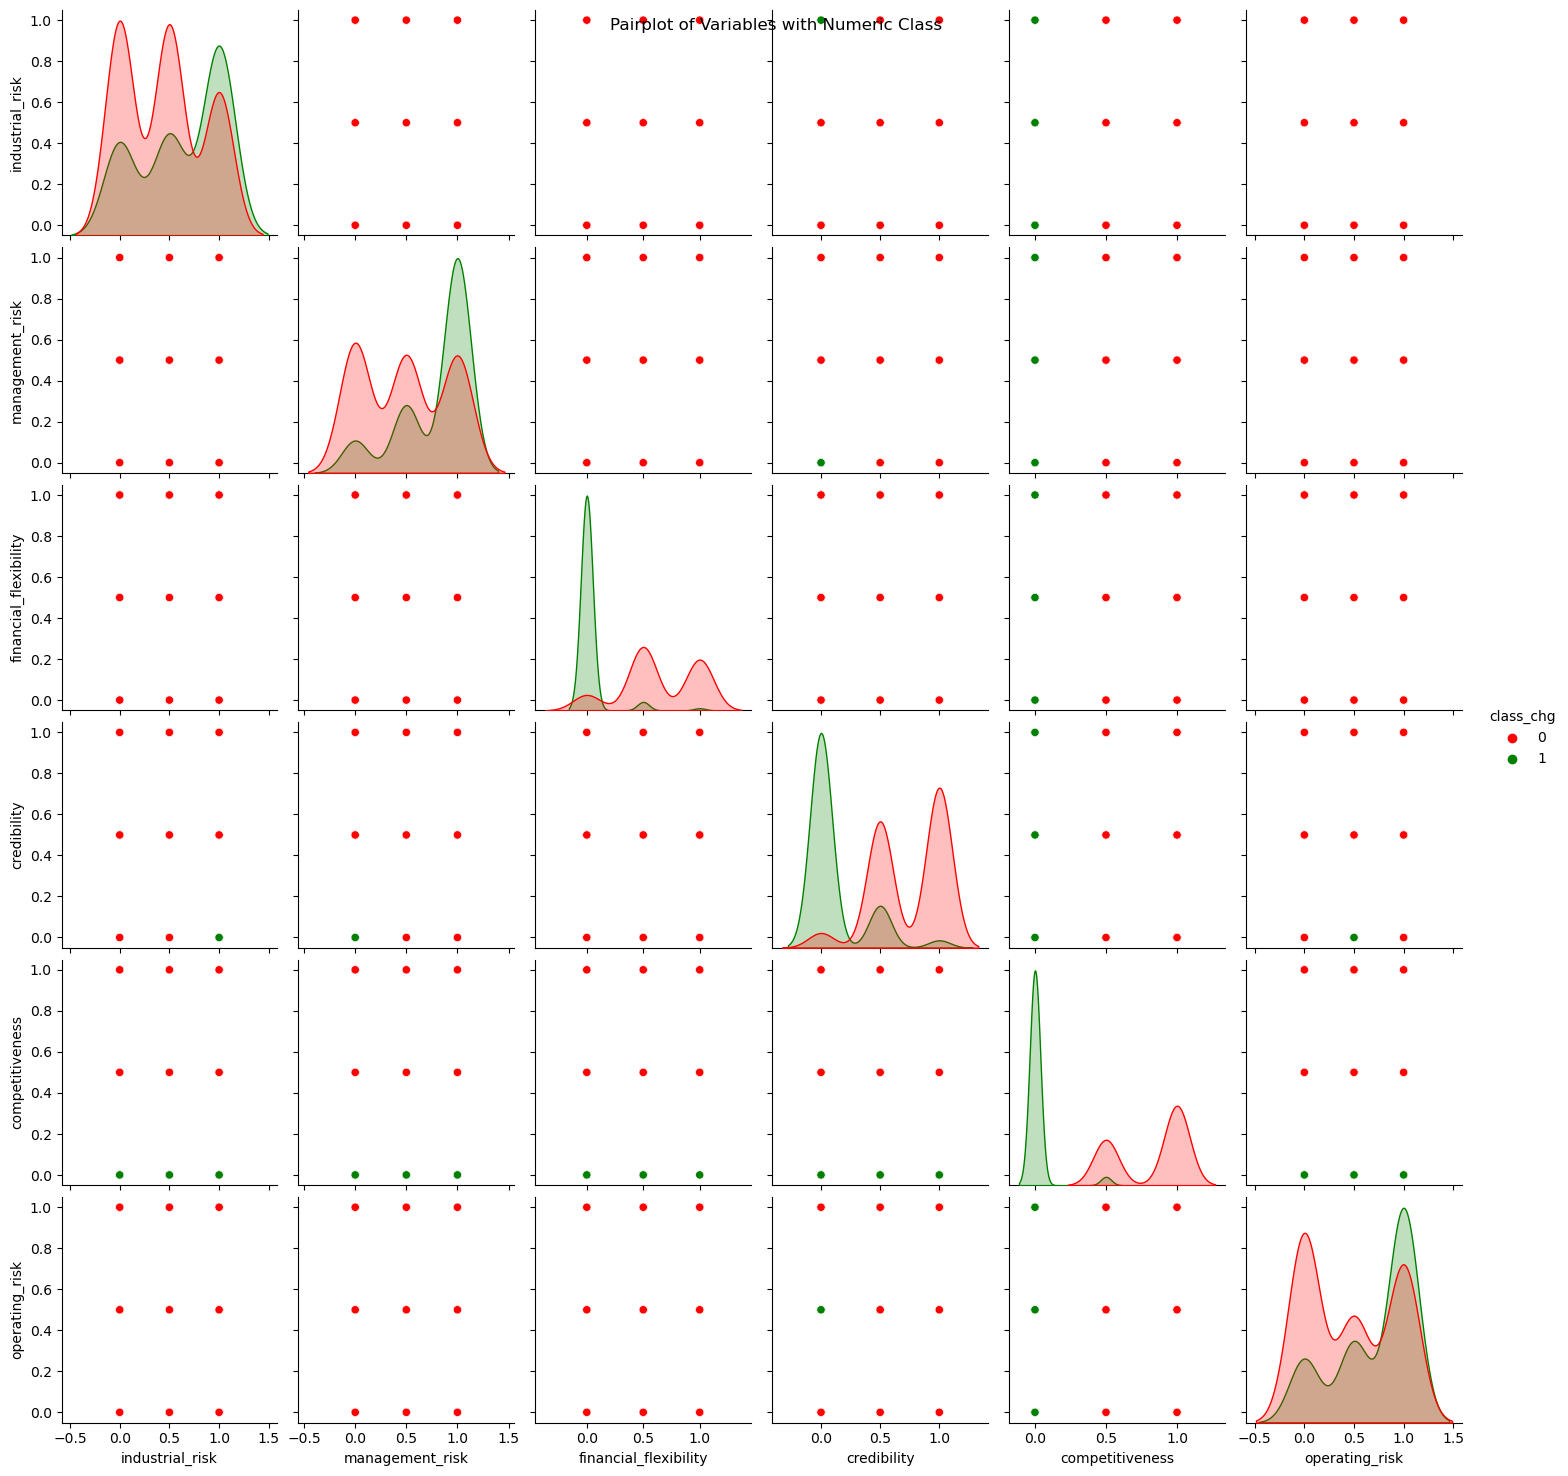

In [58]:
train_df = train_df.drop('class', axis=1)
# Check the data types of the remaining columns
print(train_df.dtypes)
# Pairplot for visualizing relationships between variables
sns.pairplot(train_df, hue='class_chg', palette={0: 'red', 1: 'green'})
plt.suptitle('Pairplot of Variables with Numeric Class')
plt.show()

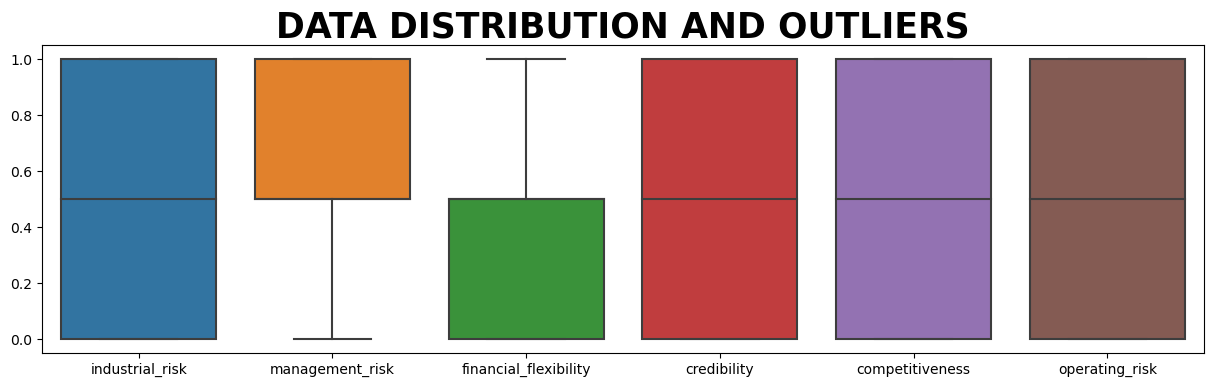

In [59]:
plt.subplots(figsize=(15,4),dpi=100) 
sns.boxplot(data=bank)
plt.title('DATA DISTRIBUTION AND OUTLIERS',fontsize=25,fontweight='bold',color='black') 
plt.show()

In [60]:
correlation_matrix = train_df.corr()
correlation_matrix

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_chg
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,-0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,-0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,-0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,0.279786
class_chg,0.227823,0.370838,-0.751020,-0.755909,-0.899452,0.279786,1.000000


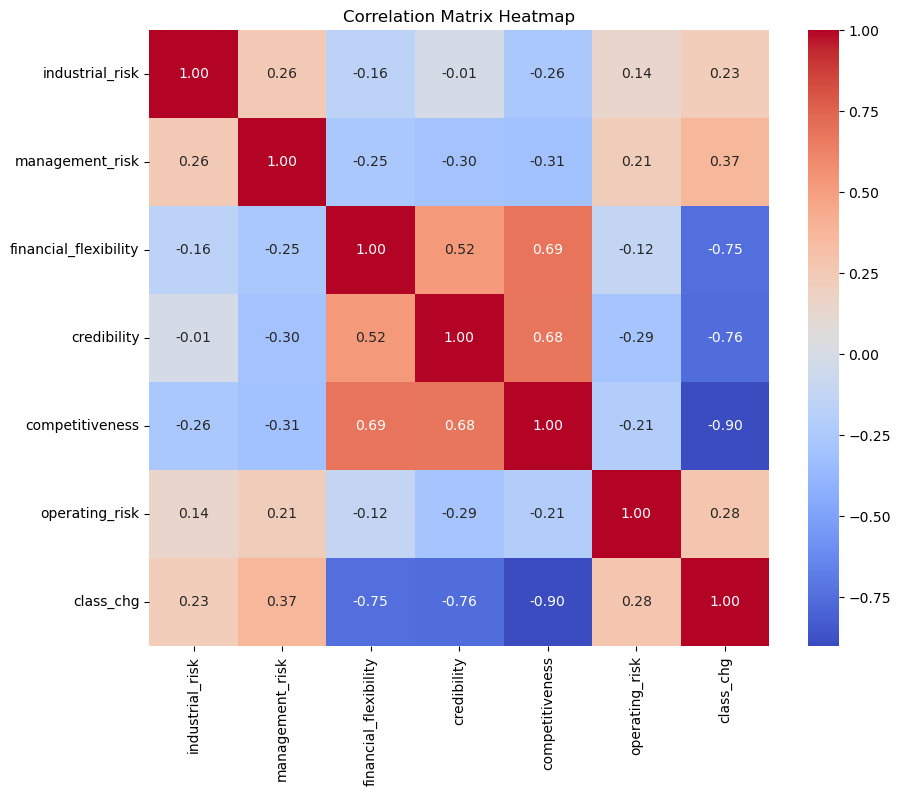

In [61]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

 checking whether the dataset is balanced or unbalanced


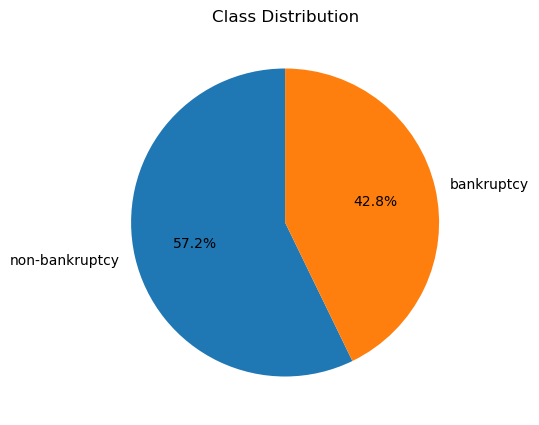

In [62]:
plt.figure(figsize=(8, 5))
class_counts = bank['class'].value_counts()
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.ylabel('')  
plt.show()

In [63]:
imbalance_ratio = class_counts[0] / class_counts[1]  # Assuming binary classification
print(f'Imbalance Ratio: {imbalance_ratio}')

Imbalance Ratio: 1.3364485981308412


# Spliting data into x and y

In [64]:
X = train_df.drop('class_chg', axis=1)
y = train_df['class_chg']

In [65]:
X

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [66]:
y

0      1
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Name: class_chg, Length: 250, dtype: int64

## Spliting data into train and test

In [67]:
from sklearn.model_selection import train_test_split # trian and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Buiding

The models which are used are :

1) Logistic regression<br>
2) Random forest<br>
3) Support Vector Machine(SVC)<br>
4) KNN model<br>
5) Naive Bayes Classifier

## Logistic Regression

In [94]:
model = LogisticRegression()
# Train the model on the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred_logi = model.predict(X_test)

In [95]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logi)
conf_matrix = confusion_matrix(y_test, y_pred_logi)
classification_rep = classification_report(y_test, y_pred_logi)

In [96]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Confusion Matrix:
 [[29  0]
 [ 0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## Random Forest

In [91]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

In [92]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf=confusion_matrix(y_test, y_pred_rf)
classification_rep_rf=classification_report(y_test, y_pred_rf)

In [93]:
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", classification_rep_rf)

Accuracy: 1.0
Confusion Matrix:
 [[29  0]
 [ 0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## Support Vector Machine(SVC)
#### 1)Kernel = Linear model
#### 2)Kernel = Poly model

1). Linear model

In [113]:
lin_model = SVC(kernel='linear')
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

In [122]:
accuracy_lin_svm = accuracy_score(y_test, y_pred_lin)
conf_matrix_lin_svm = confusion_matrix(y_test, y_pred_lin)
classification_rep_lin_svm = classification_report(y_test, y_pred_lin)

In [127]:
print("Accuracy:", accuracy_lin_svm)
print("Confusion Matrix:\n", conf_matrix_lin_svm)
print("Classification Report:\n", classification_rep_lin_svm)

Accuracy: 1.0
Confusion Matrix:
 [[29  0]
 [ 0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



2). Poly Model

In [121]:
poly_model = SVC(kernel='poly')
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

In [124]:
accuracy_poly_svm = accuracy_score(y_test, y_pred_poly)
conf_matrix_poly_svm = confusion_matrix(y_test, y_pred_poly)
classification_rep_poly_svm = classification_report(y_test, y_pred_poly)

In [126]:
print("Accuracy:", accuracy_poly_svm)
print("Confusion Matrix:\n", conf_matrix_poly_svm)
print("Classification Report:\n", classification_rep_poly_svm)

Accuracy: 0.98
Confusion Matrix:
 [[28  1]
 [ 0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## KNN 

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors =7, p = 2, metric = 'euclidean')
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)

In [102]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

In [85]:
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", classification_rep_knn)

Accuracy: 0.98
Confusion Matrix:
 [[28  1]
 [ 0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Naive Bayes Classifier
1) Gaussian Naive Bayes classifier
2) Multinomial Naive Bayes classifier

1. Gaussian Naive Bayes classifier

In [86]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [103]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)
gaussian_y_pred = gaussian_model.predict(X_test)

In [104]:
accuracy_gaussian = accuracy_score(y_test, gaussian_y_pred)
conf_matrix_gaussian = confusion_matrix(y_test, gaussian_y_pred)
classification_rep_gaussian = classification_report(y_test, gaussian_y_pred)

In [106]:
print("Accuracy:", accuracy_gaussian)
print("Confusion Matrix:\n", conf_matrix_gaussian)
print("Classification Report:\n", classification_rep_gaussian)

Accuracy: 1.0
Confusion Matrix:
 [[29  0]
 [ 0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



2.Multinomial Naive Bayes classifier

In [128]:
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train, y_train)
multinomial_y_pred = multinomial_model.predict(X_test)

In [129]:
accuracy_multinomial = accuracy_score(y_test, multinomial_y_pred)
conf_matrix_multinomial = confusion_matrix(y_test, multinomial_y_pred)
classification_rep_multinomial = classification_report(y_test, multinomial_y_pred)

In [130]:
print("Accuracy:", accuracy_multinomial)
print("Confusion Matrix:\n", conf_matrix_multinomial)
print("Classification Report:\n", classification_rep_multinomial)

Accuracy: 1.0
Confusion Matrix:
 [[29  0]
 [ 0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

